In [27]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [40]:
orig = cv.imread("lenna.png")
orig = cv.cvtColor(orig, cv.COLOR_BGR2GRAY)
encr = cv.imread("encrypted.png")[:,:,0]
decr = cv.imread("decr.png")[:,:,0]

# A. Statistical Analysis
## 1. Histogram 

In [29]:
def plotHist(img):
    plt.hist(img.ravel(),256,[0,256])
    return None
    

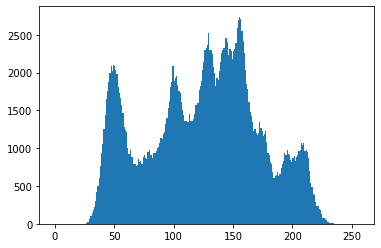

In [30]:
plotHist(orig)

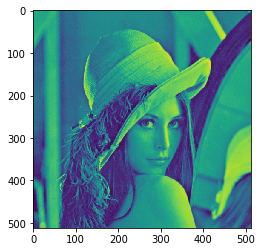

In [31]:
plt.imshow(orig)

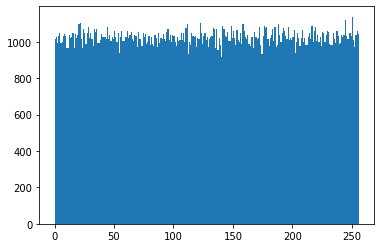

In [32]:
plotHist(encr)

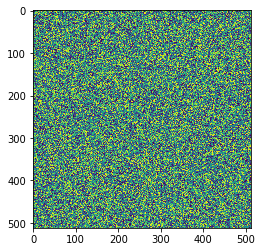

In [33]:
plt.imshow(encr)

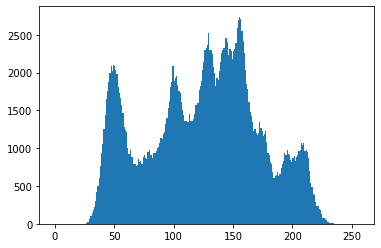

In [41]:
plotHist(decr)

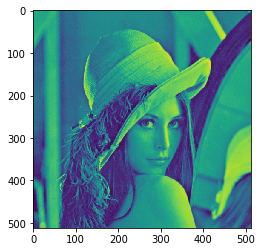

In [42]:
plt.imshow(decr)

## 2. Correlation Coefficient

In [34]:
def funcE(img):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M):
        for j in range(N):
            summ += img[i,j]
    return summ/(M*N)

def funcD(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M):
        for j in range(N):
            summ += (img[i,j]-E)**2
    return summ/(M*N)

def CovH(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M):
        for j in range(N-1):
            summ += (img[i,j]-E)*(img[i,j+1]-E)
    return summ/(M*N)

def CovV(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M-1):
        for j in range(N):
            summ += (img[i,j]-E)*(img[i+1,j]-E)
    return summ/(M*N)

def CovD(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M-1):
        for j in range(N-1):
            summ += (img[i,j]-E)*(img[i+1, j+1] - E)
    return summ/(M*N)
    
    
def rH(img):
    E = funcE(img)
    return CovH(img, E)/funcD(img,E)
def rV(img):
    E = funcE(img)
    return CovV(img, E)/funcD(img,E)
def rD(img):
    E = funcE(img)
    return CovD(img, E)/funcD(img,E)
    
    
    

In [45]:
rH(orig), rH(encr), rH(decr)

(0.9696470992206567, 0.017321470745145385, 0.9696470992206567)

In [44]:
rV(orig), rV(encr), rV(decr)

(0.983878705916363, -0.001956455394860932, 0.983878705916363)

In [43]:
rD(orig), rD(encr), rD(decr)

(0.9559608460266885, -0.001415786191834077, 0.9559608460266885)

# B. Entropy Calculation

In [38]:
def CalcEntropy(img):
    M,N = img.shape[0], img.shape[1]
    frequencies = np.array([0 for i in range(256)])
    for i in range(M):
        for j in range(N):
            intensityvalue = img[i,j]
            frequencies[intensityvalue] += 1
    probability = frequencies/(M*N)
    summ = 0
    for i in range(256):
        num = probability[i] 
        if  num == 0:
            continue
        else:
            summ += (-1*num*np.log2(num))
    return summ

In [46]:
CalcEntropy(orig), CalcEntropy(encr), CalcEntropy(decr)

(7.445060346118036, 7.999148800617345, 7.445060346118036)